# Data Selection and Modelling

To study the interplay between the science and politics of migration management, we study publications on this topic between 1951 and 2000 in terms of the actors involved in this discourse and the main themes that were discussed.

This notebook describes and explains our data selection and modelling choices. We transform all article metadata into a standard format, which requires several modelling and classification decisions. We describe these steps using the Data Scopes model (Hoekstra and Koolen 2019).

## Publications included in the study

1. REMP Publications
2. International Migration journal
3. International Migration Review journal

## Period of Study

Our analysis covers the period 1951-2000. The reason for 1951 is based on both the start of the Intergovernmental Committee on European Migration (ICEM in 1952) and the start of the Research group on European Migration Problems (REMP in 1951). 

The choice for 2000 as the end of this period is that it covers the periods of transitions, first from the ICEM first into the Intergovernmental Committee on Migration (ICM, in 1980) and then into the current International Organization on Migration (IOM, since 1989). By including 11 years after the transition to IOM, we can see what, if anything, changes after each transition.

## Extracting Articles Records From Crawled Table of Contents

We crawled all the Table of Content pages of the issues of *International Migration* (IM) journal published by Wiley and *International Migration Review* (IMR) published by Sage. The HTML files are stored in separate directories per journal. From these HTML files we extract information about:

- the issues (number, volume, publication date, section titles, publisher, journal title)
- the articles (title, author, doi, publication date, page numbers)

For the Publications and Bulletin of Research on European Migration Problems (REMP), we manually collected bibliographic information in a spreadsheet, as this information is not available online. 



### Extracting Bibliographic Records for International Migration

We start with the International Migration records. Below is a screenshot from the Table of Contents for Volume 2 of the journal of International Migration in 1962 (then called Migration).

![Migration-1962-Table-of-Contents](../images/ToC-Wiley-Migration-1962.png)

From this table of content we extract the following information per article, using the first article, i.e. the Foreword, as an example:

- `article_title`: "Foreword",
- `article_doi`: "https://onlinelibrary.wiley.com/doi/10.1111/j.1468-2435.1962.tb00852.x"
- `article_author`: "B. W. HAVEMAN && Intergovernmental Committee for European Migration"
- `article_author_index_name`: "HAVEMAN, B W && Migration, Intergovernmental Committee For European"
- `article_author_affiliation`: ""
- `article_page_range`: "5"
- `article_pub_date`: "12 July 1962"
- `article_pub_year`: 1962
- `issue_section`: "Foreword"
- `issue_number`: "3-4"
- `issue_title`: " Migration: Vol 2, No 3–4"
- `issue_page_range`: "5-83"
- `issue_pub_date`: "July–December 1962"
- `issue_pub_year`: 1962
- `volume`: "2"
- `journal`: "Migration"
- `publisher`: "Wiley"

The following modelling decisions have been made:

- The `article_doi` information is embedded in the HTML hyperlink around the title Foreword, which will take you to the article landing page. 
- For the `article_author_name`, the values `B. W. HAVEMAN` and `Intergovernmental Committee for European Migration` are in separate HTML elements in the author block, so we treat them as separate authors, even though the latter name is probably intended as the affiliation of the former. This is because, by default, no affiliation is given, and for articles where there are multiple authors, the multiple elements are used to separate the authors. We separate multiple names using a double ampersand (&&) for easy splitting of names, as a single ampersand could be part of organisation name.
- The `article_author_affiliation` field is empty by default for the IM records, because, as stated above, IM does not provide affiliation information for its authors. We include this field for consistency, because the IMR journal does provide affiliation information.
- The `article_pub_date` is taken from the string after `First published:` and the `article_pub_year` is derived from this date. We note that these first publication dates for the individual articles do not always correspond to the publication date of the issue, but strangely, when they are not the same they are often several years into the future. 
- The `issue_section` information refers to the section in the issue that an article is published in. For the Foreword, this section is called `Foreword`, the Introduction is in the `Introduction` section, followed by a number of articles in the section `Summary Records of the Debate`. These section titles are used to easily distinguish between main articles from front and back matter articles (preamble, introduction, index, ...).
- The `issue_title` is taken from the HTML metadata elements and is not displayed on the page. 
- The `issue_pub_date` and `issue_pub_year` are taken from the issue metadata that is shown in the top. We assume that the date of publication of the issue is the actual publication date of the individual articles. 
- The `journal` is taken from the HTML metadata elements and is not displayed on the page. We note that the journal was called *Migracion* in 1961 (Volume 1), *Migration* in 1962 (Volume 2) and *International Migration* from 1963 onwards.


In [1]:
import glob
import json


In [36]:
from scripts.journal_crawl import read_file_soup, extract_wiley_issue_records

# The directory with the crawled HTML files
wiley_dir = '../data/wiley-IM-crawl/'
# Get a list of all the filenames
wiley_issue_files = glob.glob(wiley_dir + '*.html')

wiley_records = []
# iterate over the files with ToC of individual issues
for wiley_issue_file in wiley_issue_files:
    # read the content of the HTML file with the Beautifulsoup library
    issue_soup = read_file_soup(wiley_issue_file)
    # extract bibliographic records of all articles from the issue ToC.
    wiley_records.extend(extract_wiley_issue_records(issue_soup))

selected_records = [record for record in wiley_records if record['issue_pub_year'] < 2000]

print('Publication Series: International Migration (Wiley)')
print('Number of records:', len(selected_records))
print('\nRecord headers:', selected_records[0].keys())
print('\nExample record:')
selected_records[0]

Publication Series: International Migration (Wiley)
Number of records: 1174

Record headers: dict_keys(['article_title', 'article_doi', 'article_author', 'article_author_index_name', 'article_author_affiliation', 'article_page_range', 'article_pub_date', 'article_pub_year', 'issue_section', 'issue_number', 'issue_title', 'issue_page_range', 'issue_pub_date', 'issue_pub_year', 'volume', 'journal', 'publisher'])

Example record:


{'article_title': 'The New U.S.A. Immigration Law',
 'article_doi': 'https://onlinelibrary.wiley.com/doi/10.1111/j.1468-2435.1965.tb00872.x',
 'article_author': 'D.G. BENN',
 'article_author_index_name': 'BENN, DG',
 'article_author_affiliation': '',
 'article_page_range': '99',
 'article_pub_date': '01 July 1965',
 'article_pub_year': 1965,
 'issue_section': 'Original Article',
 'issue_number': '3',
 'issue_title': ' International Migration: Vol 3, No 3',
 'issue_page_range': '99-180',
 'issue_pub_date': 'July 1965',
 'issue_pub_year': 1965,
 'volume': '3',
 'journal': 'International Migration',
 'publisher': 'Wiley'}

In [37]:
# Write the records to file in JSON format
wiley_records_file = '../data/wiley-IM-records.json'
with open(wiley_records_file, 'wt') as fh:
    json.dump(selected_records, fh)

### Extracting Bibliographic Records for International Migration Review

Next, we describe the extraction of records for the *International Migration Review* journal. Below is a screenshot from the Table of Contents for Volume 2 of the journal of International Migration in 1962 (then called Migration).

![International-Migration-Review-1975-Table-of-Contents](../images/ToC-Sage-International-Migration-Review-1975.png)

From this table of content we extract the following information per article, using the first article, i.e. the Foreword, as an example:

- `article_title`: "Introduction"
- `article_doi`: "https://journals.sagepub.com/doi/pdf/10.1177/019791837500900201"
- `article_author`: "John J. Macisco, Jr. && George C. Myers"
- `article_author_index_name`: "Macisco, John J Jr && Myers, George C"
- `article_author_affiliation`: "Fordham University Bronx, New York && Fordham University Bronx, New York"
- `article_page_range`: "111-114"
- `article_pub_date`: "Jun 1, 1975"
- `article_pub_year`: 1975
- `issue_section`: "Article"
- `issue_number`: "2"
- `issue_title`: "International Migration Review - Volume 9, Number 2, Jun 01, 1975"
- `issue_page_range`: null
- `issue_pub_date`: "Jun 01, 1975"
- `issue_pub_year`: 1975
- `volume`: "9"
- `journal`: "International Migration Review"
- `publisher`: "Sage Publishing"

The following modelling decision has been made (we only discuss the differences with the IM records above):

- The `article_author_affiliation` values are embedded in the HTML field for individual author names. The affiliation is displayed to the user when they hover the mouse tooltip on an author name, as shown in the middle of the image with the author `George C. Myers`, where the affiliation is `Fordham University Bronx, New York`. We note that the affiliation field does not always contain affiliation information. For some authors, it is empty, and for a small number of authors, it contains their job title and location, as for the name `Alicia Unger De Zárate` in the bottom of the image, where the affiliation field contains `Social Demographer, Mount Vernon, New York`.


In [38]:
from scripts.journal_crawl import read_file_soup, extract_sage_article_records


journal_dir = '../data/sage-IMR-crawl/'

sage_issue_files = glob.glob(journal_dir + 'International_Migration_Review-*.html')

sage_records = []
for sage_issue_file in sage_issue_files:
    sage_issue_soup = read_file_soup(sage_issue_file)
    sage_records.extend(extract_sage_article_records(sage_issue_soup))

selected_records = [record for record in sage_records if record['issue_pub_year'] < 2000]

print('Publication Series: International Migration Review (Sage Publishing)')
print('Number of records:', len(selected_records))
print('\nRecord headers:', selected_records[0].keys())
print('\nExample record:')
selected_records[0]

Publication Series: International Migration Review (Sage Publishing)
Number of records: 3913

Record headers: dict_keys(['article_title', 'article_doi', 'article_author', 'article_author_index_name', 'article_author_affiliation', 'article_page_range', 'article_pub_date', 'article_pub_year', 'issue_section', 'issue_number', 'issue_title', 'issue_page_range', 'issue_pub_date', 'issue_pub_year', 'volume', 'journal', 'publisher'])

Example record:


{'article_title': "Immigrants’ Attitudes toward their Children's Inter-Ethnic Marriages in a Canadian Community",
 'article_doi': 'https://journals.sagepub.com/doi/pdf/10.1177/019791837100500101',
 'article_author': 'Peter D. Chimbos',
 'article_author_index_name': 'Chimbos, Peter D',
 'article_author_affiliation': 'Department of Sociology, Lakehead University, Ontario, Canada.',
 'article_page_range': '5-17',
 'article_pub_date': 'Mar 1, 1971',
 'article_pub_year': 1971,
 'issue_section': 'Article',
 'issue_number': '1',
 'issue_title': 'International Migration Review - Volume 5, Number 1, Mar 01, 1971',
 'issue_page_range': None,
 'issue_pub_date': 'Mar 01, 1971',
 'issue_pub_year': 1971,
 'volume': '5',
 'journal': 'International Migration Review',
 'publisher': 'Sage Publishing'}

In [39]:
# Write the records to file in JSON format
sage_records_file = '../data/sage-IMR-records.json'
with open(sage_records_file, 'wt') as fh:
    json.dump(selected_records, fh)


### Extracting Bibliographic Records for the Publications and Bulletin of REMP 

The REMP publications and bulletins are not available online, so we have no screenshots. Instead, we manually gather information on all the publications. For several of the fields in our article record model, no information is provided, but for the fields we use in this study, we recorded the required information in a spreadsheet. 

- `article_title`: "De gaande man : gronden van de emigratiebeslissing : rapport naar aanleiding van een onderzoek / verricht in opdracht van de Regeringscommissaris voor de Emigratie "
- `article_doi`: null
- `article_author`: "Hofstede, B.P."
- `article_author_index_name`: "Hofstede, B.P."
- `article_author_affiliation`: ""
- `article_page_range`: null
- `article_pub_date`: "1958"
- `article_pub_year`: 1958
- `issue_section`: "article"
- `issue_number`: null
- `issue_title`: null
- `issue_page_range`: null
- `issue_pub_date`: "1958"
- `issue_pub_year`: 1958
- `volume`: "1"
- `journal`: "Studies over Nederlandse emigratie"
- `publisher`: "REMP"

Again, we here elaborate only the fields for which the modelling decisions are different from the IM and IMR journals:

- The `article_title` in the example is in Dutch. A handful of studies conducted and published by REMP are in Dutch. This affects our quantitative title analysis, as they have little overlap with the English language titles, therefore overlap in theme is not captured by this language difference. However, since this only concerns nine out of 169 of the REMP records, this impact is negligible. 

- The REMP publications have no `article_doi`, nor an `issue_section`, `issue_number`, `issue_title` or `issue_page_range`. 
- We did not record `article_page_range`, nor the exact `article_pub_date`, but only the `article_pub_year`.




In [40]:
%reload_ext autoreload
%autoreload 2


In [41]:
from scripts.network_analysis import retrieve_spreadsheet_records, make_bibliographic_records

relationship_records = retrieve_spreadsheet_records(record_type='relationships')

remp_records = make_bibliographic_records(relationship_records)

selected_records = [record for record in remp_records if record['issue_pub_year'] < 2000]

print('Publication Series: Research group on European Migration Problems')
print('Number of records:', len(selected_records))
print('\nRecord headers:', selected_records[0].keys())
print('\nExample record:')
selected_records[0]

Publication Series: Research group on European Migration Problems
Number of records: 169

Record headers: dict_keys(['article_title', 'article_doi', 'article_author', 'article_author_index_name', 'article_author_affiliation', 'article_page_range', 'article_pub_date', 'article_pub_year', 'issue_section', 'issue_number', 'issue_title', 'issue_page_range', 'issue_pub_date', 'issue_pub_year', 'volume', 'journal', 'publisher'])

Example record:


{'article_title': 'De gaande man : gronden van de emigratiebeslissing : rapport naar aanleiding van een onderzoek / verricht in opdracht van de Regeringscommissaris voor de Emigratie ',
 'article_doi': None,
 'article_author': 'Hofstede, B.P.',
 'article_author_index_name': 'Hofstede, B.P.',
 'article_author_affiliation': '',
 'article_page_range': None,
 'article_pub_date': '1958',
 'article_pub_year': 1958,
 'issue_section': 'article',
 'issue_number': None,
 'issue_title': None,
 'issue_page_range': None,
 'issue_pub_date': '1958',
 'issue_pub_year': 1958,
 'volume': '1',
 'journal': 'Studies over Nederlandse emigratie',
 'publisher': 'REMP'}

In [42]:

remp_records_file = '../data/remp-records.json'
with open(remp_records_file, 'wt') as fh:
    json.dump(remp_records, fh)

## Data Quality Inspection

Here we conduct an inspection of data quality to identify potential limitations and pitfalls in using it and relying on it for interpreting the outcomes of later analyses.

For this, we load all the records in a Pandas dataframe to allow selecting, sorting and inspection along multiple dimensions.

In [43]:
import pandas as pd

remp_records_file = '../data/remp-records.json'
sage_records_file = '../data/sage-IMR-records.json'
wiley_records_file = '../data/wiley-IM-records.json'

remp_df = pd.read_json(remp_records_file)
sage_df = pd.read_json(sage_records_file)
wiley_df = pd.read_json(wiley_records_file)

df = pd.concat([remp_df, sage_df, wiley_df])
df.publisher.value_counts()


Sage Publishing    3913
Wiley              1174
REMP                169
Name: publisher, dtype: int64

The REMP publications include four series:

1. REMP-bulletin: ...
2. Publications of the research group for european migration problems
3. Studies in Social Life
4. Studies over Nederlandse emigratie

As mentiond before, the Dutch series *Studies over Nederlandse emigratie* contains only a handful of publications. 

The International Migration journal was first called *Migracion* (in 1961), then *Migration* (1962) and then *International Migration* afterwards (1963 till the present).

In [44]:
df.journal.value_counts()

International Migration Review                                        3913
International Migration                                               1113
REMP-bulletin                                                          111
Publications of the research group for european migration problems      36
Migracion                                                               34
Migration                                                               27
Studies in Social Life                                                  13
Studies over Nederlandse emigratie                                       9
Name: journal, dtype: int64

#### Publication Years



<AxesSubplot:>

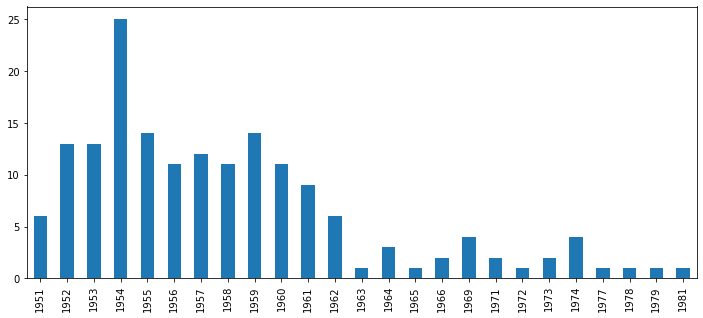

In [45]:
remp_df.issue_pub_year.value_counts().sort_index().plot(kind='bar', figsize=(12, 5), xlim=(1950, 2000))

As can be seen from the bar graph above, the REMP publications are mostly published in the 1950s and early 1960s, just before merging with *Migration* to become the *International Migration* journal. In more than one way, the REMP publications and IM can therefore be seen as a single continuous publication series edited by Gunther Beyer.

<AxesSubplot:>

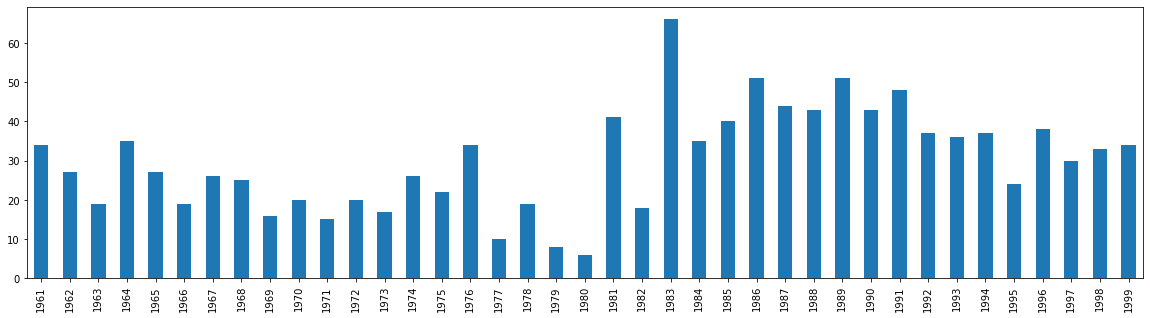

In [46]:
wiley_df.issue_pub_year.value_counts().sort_index().plot(kind='bar', figsize=(20, 5))

Counting the number of IM articles per year reveals a dip between 1977 and 1980 (e.g. 1979 has only 8, 1980 has only 6), whereas others years have more than 15. In contrast, 1983 has a strong peak with over 60 publications. We investigate these dips and peak below.

For now, we also observe that the number of articles per year seems to increase over time.  


<AxesSubplot:>

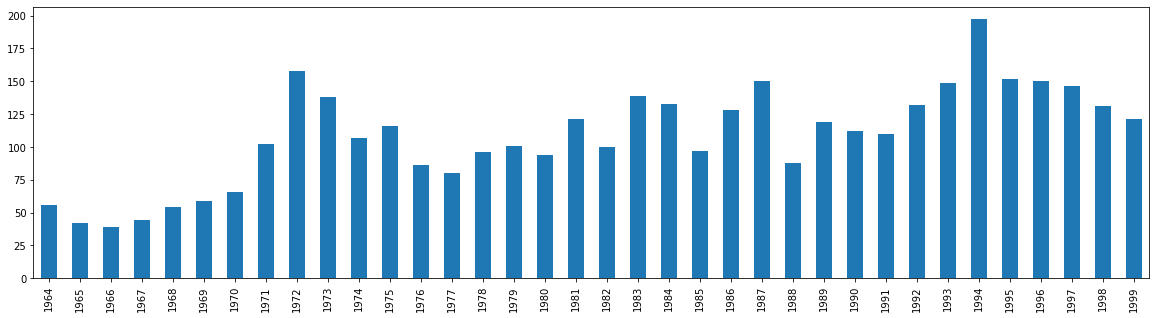

In [47]:
sage_df.issue_pub_year.value_counts().sort_index().plot(kind='bar', figsize=(20, 5))

Here we also see an overall increase in publications, with some small dips and peaks, but nothing that signals a potential problem.

### Investigating dips in yearly publications

We zoom in on the years for which IM has few publications to see if issues that would constrain the analysis.

In [48]:
dip_df = wiley_df[wiley_df.issue_pub_year.isin([1977, 1978 ,1979, 1980])]
dip_df[['issue_pub_year','issue_number']].sort_values(['issue_pub_year', 'issue_number']).drop_duplicates()

,issue_pub_year,issue_number
893,1977,1
423,1977,4
370,1978,1
591,1978,2
1011,1978,3-4
528,1979,1-2
802,1980,1-2


Listing the issues of those years reveals that each year had only one or two short issues. E.g. for 1977 only issues 1 and 4 are available (suggesting 2 and 3 are missing), and for 1979 and 1980 only a single volume double issue is available (perhaps the only issue published in those year). 

This could be a signal that there is a mistake in the data extraction process, or that these were just unusual years. Checking the journal website reveals that these are the only issues available, so there seems to be no mistake in the extraction process. The fact that only issues 1 and 4 for 1977 are present does suggest that the Wiley website is missing two issues.

In contrast, in some years, there are relatively many articles. This is because each original article is published in three languages (English, French and Spanish), for instance Issue 2 in Volume 21 (from 1983). See [https://onlinelibrary.wiley.com/toc/14682435/1983/21/2](https://onlinelibrary.wiley.com/toc/14682435/1983/21/2).


In [49]:
wiley_df[(wiley_df.issue_pub_year == 1983) & (wiley_df.article_author.isna())][['article_author', 'article_title']]

,article_author,article_title
119,None,"Books, Periodicals, Pamphlets, Statistics"
799,None,Book Reviews
800,None,"Books, Periodicals, Pamphlets, Statistics"
801,None,INTERGOVERNMENTAL COMMITTEE FOR MIGRATION COMI...
924,None,Addendum
925,None,"Books, Periodicals, Pamphlets, Statistics"
1065,None,Bibliography on Undocumented Migrants or Migra...
1066,None,Introduction
1067,None,Introduction
1068,None,Introduction


These records of the same publication in multiple languages has consequences for the content analysis of the titles. Although most words across the three languages do not overlap, some do, and counting all three versions would artificially inflate their counts in a frequency analysis. 

### Article Types

Each publication series has its own types of articles. There are research articles, review articles, front matter articles (introductions, forewords, prefaces, etc.) and back matter articles (indices, bibliographies, etc.) and other types of articles. For IM and IMR, the type of article is derived from the section of an issue. For the REMP publications, we added `issue_section` labels manually, with prefaces and introductions being labelled as `front_matter` and the main articles as `article`.

For the content analysis of the article titles, we added a column `article_type` to the dataframe, and add a label per publication that is either `main` for articles describing migration-related research, `review` for book reviews, and `supplementary` for other items, such as front and back matter. 

### Article Types in REMP Publications

In [50]:
remp_df.issue_section.value_counts()

article         143
front_matter     26
Name: issue_section, dtype: int64

In [51]:
remp_df['article_type'] = remp_df.issue_section.apply(lambda x: 'main' if x == 'article' else 'supplementary')

remp_df.article_type.value_counts()

main             143
supplementary     26
Name: article_type, dtype: int64

In [78]:
remp_df[remp_df.journal == 'Studies over Nederlandse emigratie']

,article_title,article_doi,article_author,article_author_index_name,article_author_affiliation,article_page_range,article_pub_date,article_pub_year,issue_section,issue_number,issue_title,issue_page_range,issue_pub_date,issue_pub_year,volume,journal,publisher,article_type
0,De gaande man : gronden van de emigratiebeslis...,NaN,"Hofstede, B.P.","Hofstede, B.P.",,NaN,1958,1958,article,NaN,NaN,NaN,1958,1958,1,Studies over Nederlandse emigratie,REMP,main
1,Preface,NaN,"Groenman, Sj.","Groenman, Sj.",,NaN,1958,1958,front_matter,NaN,NaN,NaN,1958,1958,1,Studies over Nederlandse emigratie,REMP,supplementary
2,"Emigranten, niet-emigranten : kwantitatieve an...",NaN,"Frijda, N.H.","Frijda, N.H.",,NaN,1960,1960,article,NaN,NaN,NaN,1960,1960,2,Studies over Nederlandse emigratie,REMP,main
3,Introduction,NaN,"Duijker, H.C.J.","Duijker, H.C.J.",,NaN,1960,1960,front_matter,NaN,NaN,NaN,1960,1960,2,Studies over Nederlandse emigratie,REMP,supplementary
4,Preface,NaN,"Haveman, B.W.","Haveman, B.W.",,NaN,1960,1960,front_matter,NaN,NaN,NaN,1960,1960,2,Studies over Nederlandse emigratie,REMP,supplementary
5,Kenmerken van de Nederlandse emigrant : een an...,NaN,"Wentholt, R.","Wentholt, R.",,NaN,1961,1961,article,NaN,NaN,NaN,1961,1961,3,Studies over Nederlandse emigratie,REMP,main
6,Introduction,NaN,"Groenman, Sj.","Groenman, Sj.",,NaN,1961,1961,front_matter,NaN,NaN,NaN,1961,1961,3,Studies over Nederlandse emigratie,REMP,supplementary
7,Preface,NaN,"Haveman, B.W.","Haveman, B.W.",,NaN,1961,1961,front_matter,NaN,NaN,NaN,1961,1961,3,Studies over Nederlandse emigratie,REMP,supplementary
8,Emigranten overzee : resultaten van een eerste...,NaN,"Frijda, N.H.","Frijda, N.H.",,NaN,1962,1962,article,NaN,NaN,NaN,1962,1962,4,Studies over Nederlandse emigratie,REMP,main


There are 4 main publications in the Dutch-language series _Studies over Nederlandse emigratie_, along with an introduction and/or a preface. For the title analysis, we leave these out, as the Dutch words have a low frequency and would receive a high importance scores when using TF\*IDF even though they do not reflect well the main topics in the international discourse coalitions.

In [79]:
remp_df = remp_df[remp_df.journal != 'Studies over Nederlandse emigratie']

### Article types in International Migration

For IM, the issue section titles are diverse and inconsistent over time (e.g. `Original Article` vs. `Original Articles`). There are also many section titles that are only used for a single article. 

The analysis below is used to come to a reasoned selection of articles to include in the title analysis.

In [80]:
wiley_df.issue_section.value_counts()

Original Article                                        502
Original Articles                                       113
Information                                              49
Books, Periodicals, Pamphlets, Statistics                45
Book Reviews                                             43
                                                       ... 
International Organization For Migration(Iom)             1
La Ponction D E Matiere Grise Dans Les Pays E N Voie      1
Variaciones Regionales De La Emigracion Francesa          1
Books, Periodicals, Pamphlets Statistics                  1
Résumés des débats Conclusions and Recommendations        1
Name: issue_section, Length: 151, dtype: int64

In [81]:
wiley_df.issue_section.str.lower().value_counts()

original article                                                                                                       502
original articles                                                                                                      113
information                                                                                                             49
books, periodicals, pamphlets, statistics                                                                               45
book reviews                                                                                                            43
                                                                                                                      ... 
integration of refugees                                                                                                  1
opening statements                                                                                                       1
el ‘drenaje de c

#### Article Types in International Migation - Recurring article titles

some article titles are used repeatedly across issues. These are typical items `books, periodcials, pamphplets, statistics`, or `information` or `note from the editor`. For the content analysis of the discourse on migration, such articles are not useful. 

In [82]:
wiley_df.article_title.str.lower().value_counts()

books, periodicals, pamphlets, statistics                                                                           45
book reviews                                                                                                        39
note from the editor                                                                                                35
information                                                                                                         30
recent publications                                                                                                 19
                                                                                                                    ..
economic and social repercussions of spanish emigration to countries overseas                                        1
migration and development: a global agenda for the future                                                            1
patterns of australian and canadian immigration 

In [83]:
title_counts = wiley_df.article_title.str.lower().value_counts()
title_counts[title_counts > 1]

books, periodicals, pamphlets, statistics                                                                                                   45
book reviews                                                                                                                                39
note from the editor                                                                                                                        35
information                                                                                                                                 30
recent publications                                                                                                                         19
publications, periodicals, pamphlets, statistics                                                                                            16
introduction                                                                                                                                12

Above are all the IM article titles that occur more than once. Some of the titles occurring twice seem topically relevant, but titles occurring more than twice are not. We use the frequency threshold of $> 2$ for `supplementary` articles and $\leq 2$ for `main` articles.

In [84]:

wiley_df['article_type'] = wiley_df.article_title.apply(lambda x: 'supplementary' if title_counts[x.lower()] > 2 else 'main')


In [85]:
wiley_df.article_type.value_counts()

main             931
supplementary    243
Name: article_type, dtype: int64

#### Article Types in International Migration - Authorless articles

Among the articles that are labelled as `main`, there are a few hundred with no specified author. We investigate these further to filter out titles that cause potential problems for content analysis.

In [86]:
# There are 210 'main' articles with no specified author
len(wiley_df[(wiley_df.article_author.isna()) & (wiley_df.article_type == 'main')])

210

In [87]:
authorless_df = wiley_df[(wiley_df.article_author.isna()) & (wiley_df.article_type == 'main')]
authorless_df.issue_pub_year.value_counts()

1983    27
1981    25
1986    15
1976    13
1964    11
1974    11
1965     8
1962     7
1969     7
1961     6
1967     6
1992     6
1991     6
1989     6
1968     5
1979     5
1987     5
1970     4
1963     4
1994     4
1966     4
1972     4
1982     3
1999     3
1975     3
1998     2
1993     2
1985     2
1971     1
1990     1
1973     1
1995     1
1997     1
1988     1
Name: issue_pub_year, dtype: int64

The majority of these authorless articles are published in one of four years: 1983, 1981, 1986 or 1976. We zoom in on these years to see what kind of articles they are:

In [88]:
authorless_df[authorless_df.issue_pub_year.isin([1981])].article_title

810                                         Introducción
811                                             Preamble
812                                Migrant Women Workers
813                 Migrant Women not gainfully employed
814                  Social Advancement of Migrant Women
815           Migrant Women who stay in the Home Country
816     Migrant Women returning to the Country of Origin
817                           Undocumented Migrant Women
818                                        Refugee Women
819                                            Préambule
820                      La femme migrante dans l'emploi
821               La femme migrante sans emploi lucratif
822               Promotion sociale de la femme migrante
823     La femme migrante restée dans son pays d'origine
824    La femme migrante retournant dans son pays d'o...
825           La femme migrante en situation irrégulière
826                                    La femme réfugiée
827                            

In [89]:
authorless_df[authorless_df.issue_pub_year.isin([1983])].article_title

924                                              Addendum
1065    Bibliography on Undocumented Migrants or Migra...
1070                                             Preamble
1071    Specific Motivations and Underlying Causes of ...
1072    The Rights and Obligations of Migrants in Rece...
1073    Undocumented Migrants and the Regularization o...
1074    Effects of Undocumented Migration Possible Rem...
1075    (a) Examination of the negative Effects for Co...
1076    (b) Specific Measures, including Agreements be...
1077                                            Préambule
1078    Motifs spécifiques et causes profondes de la m...
1079    Les droits et les obligations des migrants dan...
1080    Les migrants sans documents et la régularisati...
1081    Effets De La Migration Sans Documents Rem6Des ...
1082    a)Examen des effets nkgatifs de la migration s...
1083    b)Mesures spécifiques, et notamment accords en...
1084                                            Preambulo
1085    Motivo

In [90]:
authorless_df[authorless_df.issue_pub_year.isin([1986])].article_title

103     Working permits issued to non-Jordanian IImmig...
157     UN COLLOQUE INTERNATIONAL SUR LES SOCIETES PLU...
302                  Publications, Periodicals, Pamphlets
1044    Guest Speakers/Orateurs Invites/Oradores Invit...
1047    The Meaning, Modalities and Consequences of Re...
1050    The Return of International Labour Migrants in...
1052    Measures to Facilitate the Reintegration of Mi...
1056    Measures to Facilitate the Return and Reintegr...
1058    Summaries of Debates Conclusions and Recommend...
1059    Résumés des débats Conclusions and Recommendat...
1060    Résuménes de los debates Conclusions y Recomme...
1061    LIST OF DOCUMENTS/LISTE DE DOCUMENTS/LISTA DE ...
1062                           Participants/Participantes
1063                                  C. EXPERTS/EXPERTOS
1064           ICM-Addresses/CIM-Adresses/CIM-Direcciones
Name: article_title, dtype: object

In [91]:
authorless_df[authorless_df.issue_pub_year.isin([1976])].article_title

262                                   General Conclusions
263     Recommendations on Migration of Family Units a...
264     Recommendations on Problems confronting Migran...
265     Recommandations sur la Migration de Familles e...
266     Recommandations sur les Problèmes qui se posen...
267     Recomendaciones sobre la Migración de Unidades...
268     Recomendaciones sobre los Problemas que se pla...
275                        Working and Information Papers
666                        SPANISH EMIGRATION LEGISLATION
667             LA LEGISLATION ESPAGNOLE SUR L'EMIGRATION
668                    LEGISLACIÓN ESPANOLA DE EMIGRACIÓN
1118    Third Seminar on Adaptation and Integration of...
1122                                  Information on ICEM
Name: article_title, dtype: object

In these four years, many of the authorless `main` articles are either 

- more supplementary in nature (e.g. `Participants/Participantes`, `LIST OF DOCUMENTS/LISTE DE DOCUMENTS. LISTA DE DOCUMENTOS` and `Information on ICEM`), or
- the same article in three different languages (e.g. `Migrant Women Workers`, `La femme migrante dans l'emploi` and `Las trabajadoras migrantes`).


We conclude that the authorless 'main' articles should be excluded from content analysis, as the more supplementary ones are not topical and the translations would artificially inflate the frequency of content words that are the same across the different languages. We set their `article_type` to `supplementary` as well:

In [92]:
# set all article type for all authorless articles to 'supplementary'
for row in authorless_df.iterrows():
    index = row[0]
    wiley_df.loc[index, 'article_type'] = 'supplementary'
# set all article type for all book review articles to 'review'
for row in wiley_df[wiley_df.issue_section == 'Book Reviews'].iterrows():
    index = row[0]
    wiley_df.loc[index, 'article_type'] = 'review'

wiley_df[wiley_df.article_author.isna()].article_type.value_counts()

supplementary    368
review            41
Name: article_type, dtype: int64

In [93]:
wiley_df.article_type.value_counts()

main             719
supplementary    412
review            43
Name: article_type, dtype: int64

This leaves 747 main titles and 47 review titles for content analysis. 

### Article Types in International Migration Review

In IMR, there are two main categories, `Article` and `Book Reviews`, as well as a list of less common sections:

In [94]:
sage_df.issue_section.value_counts()


Book Reviews                                           1842
Article                                                1539
Books Received                                          106
Documentation                                            71
Review of Reviews                                        69
Research Note                                            41
Communications                                           30
Conference Report                                        28
Review                                                   24
Index                                                    19
Legislative and Judicial Developments                    14
Conference Reports                                       13
Editorial                                                 9
Research Notes                                            8
Errata                                                    8
Introduction                                              8
Commentary                              

Among the issue sections that have two or more articles, there are a few variants of the `Book Reviews` section, namely `Book Review` and `Books Reviews`:

In [95]:
section_counts = sage_df.issue_section.value_counts()
section_counts[section_counts > 2]

Book Reviews                             1842
Article                                  1539
Books Received                            106
Documentation                              71
Review of Reviews                          69
Research Note                              41
Communications                             30
Conference Report                          28
Review                                     24
Index                                      19
Legislative and Judicial Developments      14
Conference Reports                         13
Editorial                                   9
Research Notes                              8
Errata                                      8
Introduction                                8
Commentary                                  7
Appendix                                    6
Errata Corrige                              6
Documentary Note                            5
International Migration Statistics          4
Legislative                       

We first normalise these variant section titles, then set the article types to `main` for articles in the `Article` sections, all book reviews to `review` and the remaining articles to `supplementary`:


In [96]:
# First, normalise book review section titles to 'Book Reviews'
sage_df['issue_section'] = sage_df['issue_section'].replace(['Book Review', 'Books Reviews'], 'Book Reviews')
# Next, create a mapping from section titles to article types
section_map = {
    'Article': 'main',
    'Book Reviews': 'review'
}
# Finally, apply the mapping to the issue sections to add an article type column
sage_df['article_type'] = sage_df.issue_section.apply(lambda x: section_map[x] if x in section_map else 'supplementary')

sage_df.article_type.value_counts()

review           1842
main             1539
supplementary     532
Name: article_type, dtype: int64

In [97]:
# concate the three data frames into a single one
df = pd.concat([remp_df, wiley_df, sage_df])

# list the number of articles per type and per publisher
df[['publisher', 'article_type']].value_counts().sort_index()

publisher        article_type 
REMP             main              139
                 supplementary      21
Sage Publishing  main             1539
                 review           1842
                 supplementary     532
Wiley            main              719
                 review             43
                 supplementary     412
dtype: int64

## Data Selection

Before performing a content analysis of the article titles, we want to make a selection of titles that is focused on the academic debate around migration, without any distracting non-topical titles that might obscure any topical shifts across the decades from 1950-2000.

Given the analysis above, we use the following three sets of articles for analysis:

1. main articles from REMP and IM, plus the IM review articles,
2. main articles from IMR
3. review articles from IMR

The reason to combine the main and review articles of IM is that the number of review articles is too low for independent content analysis. 


In [98]:
main_df = df[df.article_type.isin(['main', 'review'])]
main_df[['publisher', 'article_type']].value_counts().sort_index()

publisher        article_type
REMP             main             139
Sage Publishing  main            1539
                 review          1842
Wiley            main             719
                 review            43
dtype: int64

In [99]:
title_file = '../data/main-review-article-records.csv'
main_df.to_csv(title_file)